# Plotting Review

Review what we know about `matplotlib` and see some new tricks.

### How to set up a Jupyter Notebook

```
$ jupyter-notebook
```

In [1]:
print("Hello world!")

Hello world!


In [2]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [3]:
print(i)

9


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from sklearn import datasets

data = datasets.load_breast_cancer()

print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
print(data.data.shape)
print(data.target.shape)
print(data.feature_names)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(data.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


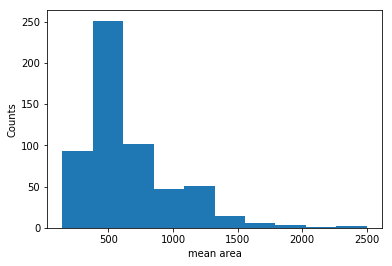

In [9]:
# pull out one feature, for all samples (all rows, index 3)
X = data.data[:, 3]

fig, ax = plt.subplots()
ax.hist(X);

ax.set_xlabel(data.feature_names[3]); # semicolon gets rid of text, output looks cleaner
ax.set_ylabel('Counts');

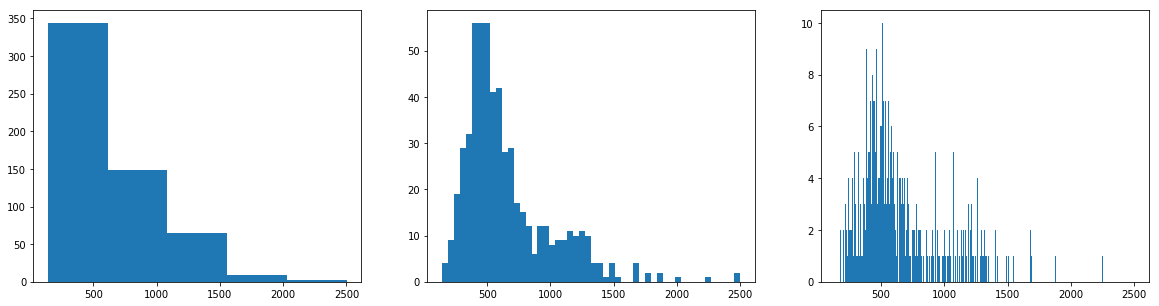

In [10]:
fig_bins, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))
ax1.hist(X, bins=5)
ax2.hist(X, bins=50) # this one is the most representative of this data
ax3.hist(X, bins=500);

In [11]:
X = data.data[:,13]
mean = np.mean(X)
sd = np.std(X)
minx = np.min(X)
median = np.median(X)
maxx = np.max(X)

summary = """
Mean:    {:6.2f} # f means float, .2 means show 2 decimal places
SD:      {:6.2f}
Minimum: {:5.1f}
Median:  {:5.1f}
Maximum: {:5.1f}
""".format(mean, sd, minx, median, maxx)
print(summary)


Mean:     40.34 # f means float, .2 means show 2 decimal places
SD:       45.45
Minimum:   6.8
Median:   24.5
Maximum: 542.2



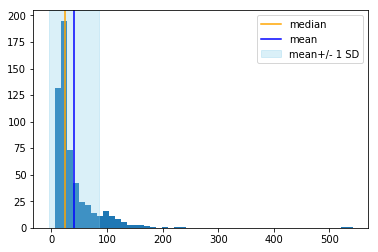

In [12]:
fig, ax = plt.subplots()
ax.hist(X, bins=50)

ax.axvline(median, color='orange', label='median')
ax.axvline(mean, color='blue', label='mean')
ax.axvspan(mean-sd, mean+sd, color='skyblue', alpha=0.3, label='mean+/- 1 SD')
ax.legend()

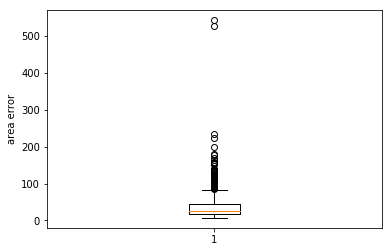

In [13]:
# Boxplot: Shows outliers based on 1.5*IQR
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_ylabel(data.feature_names[13]);

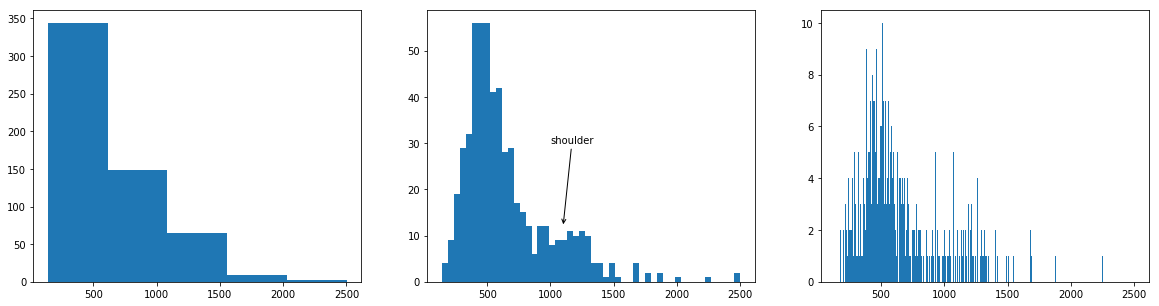

In [14]:
fig_bins.axes[1].annotate('shoulder', xy=(1100,12), xytext=(1000,30),
                         arrowprops=dict(arrowstyle='->', color='k'))
fig_bins

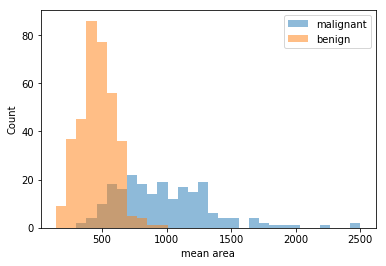

In [15]:
X = data.data[:,3]
Y = data.target

minx = np.min(X)
maxx = np.max(X)

fig, ax = plt.subplots()
ax.hist(X[Y==0], label=data.target_names[0], alpha=0.5, range=(minx, maxx), bins=30);
ax.hist(X[Y==1], label=data.target_names[1], alpha=0.5, range=(minx, maxx), bins=30);
ax.legend();
ax.set_xlabel(data.feature_names[3])
ax.set_ylabel("Count");
# print(Y==0)

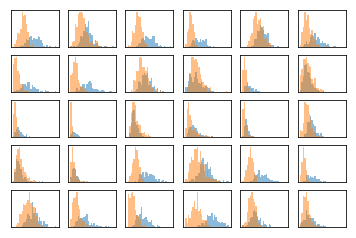

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=6)
for i, ax in enumerate(axes.flatten()):
    X = data.data[:,i]
    minx = np.min(X)
    maxx = np.max(X)
    ax.hist(X[Y==0], label=data.target_names[0], alpha=0.5, range=(minx, maxx), bins=30);
    ax.hist(X[Y==1], label=data.target_names[1], alpha=0.5, range=(minx, maxx), bins=30);
    ax.set_xticks([])
    ax.set_yticks([])

In [17]:
# pull out 2 quantitative features
xi = 3
yi = -3

X = data.data[:,xi]
Y = data.data[:,yi]
xname = data.feature_names[xi]
yname = data.feature_names[yi]

targets = data.target
mal = (targets == 0)

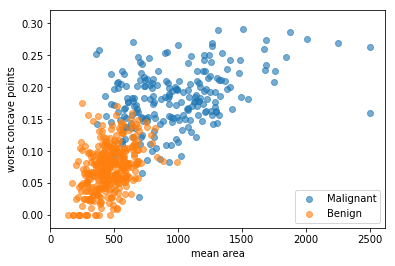

In [18]:
fig, ax = plt.subplots()
ax.scatter(X[mal],Y[mal], label="Malignant", alpha=0.6)
ax.scatter(X[~mal],Y[~mal], label="Benign", alpha=0.6)
ax.legend()
ax.set_xlabel(xname)
ax.set_ylabel(yname);

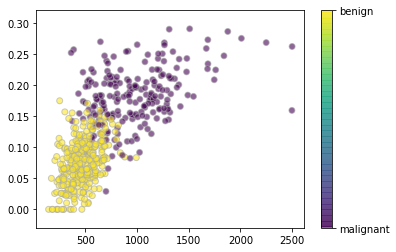

In [19]:
fig, ax = plt.subplots()
im = ax.scatter(X,Y,c=targets, cmap='viridis', edgecolor='darkgray', alpha=0.6);

target_vals = sorted(list(set(targets)))
cbar=fig.colorbar(im, ax=ax, ticks=target_vals)
cbar.ax.set_yticklabels([data.target_names[i] for i in target_vals]);

## Toy hypothesis test

H0: A_m == A_w

H0: (A_m - A_w) == 0

Ha: (A_m - A_w) != 0

In [20]:
xi = 3
yi = 23

X = data.data[:,xi]
Y = data.data[:,yi]

xname = data.feature_names[xi]
yname = data.feature_names[yi]
print(xname, ",", yname)

mean area , worst area


In [21]:
diff = X-Y
mean = 0
sd = np.std(diff)
z = (diff-mean)/sd

thresh = 1.96
significance = (z > thresh) | (z < -thresh) # | is or

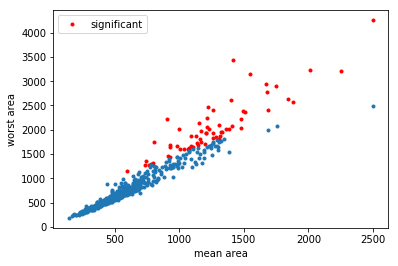

In [22]:
fig, ax = plt.subplots()
ax.plot(X[significance],Y[significance], '.', color='r', label='significant');
ax.plot(X[~significance],Y[~significance], '.');
ax.legend()
ax.set_xlabel(xname)
ax.set_ylabel(yname);

In [23]:
# manhattan plotting
f = open("/Users/cmdb/qbb2018-answers/class4/plink.E6_Berbamine.qassoc")
header = f.readline()
data = {}

for line in f:
    fields = line.split()
    if fields[-1] == 'NA':
        continue
    chrom = fields[0]
    pos = int(fields[2])
    p = float(fields[-1])
    logp = -np.log10(p)
    
    if chrom not in data:
        data[chrom] = {'positions': [], 'logpvals':[]}
    data[chrom]['positions'].append(pos)
    data[chrom]['logpvals'].append(logp)

In [24]:
print(data['chrI']['logpvals'])

[8.30076949711659, 7.79805693659835, 5.369673845196053, 5.850472986245652, 9.779107750780481, 9.976336081802206, 10.495393229358045, 18.055912320584564, 18.916497380169734, 11.993962045002682, 11.161276809968628, 11.80493100353141, 11.846185135655471, 11.704652851666381, 12.155709256745657, 10.790216985151485, 10.422968014373968, 11.626168854926169, 11.643974142806877, 11.209081804785422, 11.516555351901465, 11.069000058043848, 10.136855653747332, 11.474048658751988, 11.555330769061475, 11.490259984429617, 11.403732873604485, 11.159204101152906, 11.56019378860667, 11.548520594875137, 11.856360764725457, 11.519561852822182, 11.182038195468007, 11.023466619608062, 12.110026361596004, 11.561615892965285, 11.133771752620353, 12.309183942019084, 12.54882784248746, 13.187889158796901, 13.212539525481585, 12.442974277613617, 13.009306039320249, 12.446845451830374, 13.708409174341998, 12.790753151246626, 14.220764368324136, 14.183559832043862, 13.335922409814925, 12.856048883576037, 12.6394065

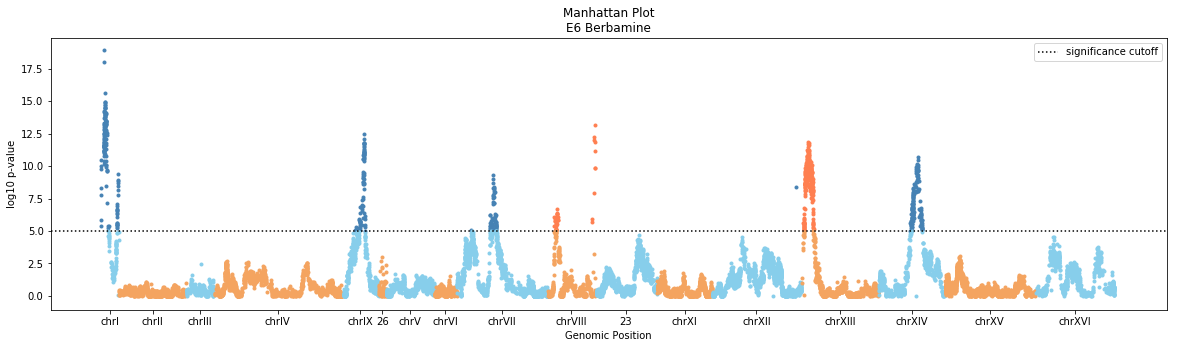

In [25]:
fig, ax = plt.subplots(figsize=(20,5))

colors = ['skyblue', 'sandybrown']
highlights = ['steelblue', 'coral']

offset = 0
tick_pos = []
tick_labels = []
for i, chrom in enumerate(data.keys()):
    x = np.array(data[chrom]['positions'])
    y = np.array(data[chrom]['logpvals'])
    
    sig = (y > 5)
    
    ax.scatter(x[sig] + offset, y[sig], marker='.', c=highlights[i%2])
    ax.scatter(x[~sig] + offset, y[~sig], marker='.', c=colors[i%2])
    
    tick_labels.append(chrom)
    maxx = max(x)
    tick_pos.append(offset + maxx/2)
    offset += maxx
    
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels);

ax.axhline(5, c='k', ls=':', label='significance cutoff')
ax.legend()
ax.set_xlabel("Genomic Position")
ax.set_ylabel("log10 p-value")
ax.set_title("Manhattan Plot\nE6 Berbamine");

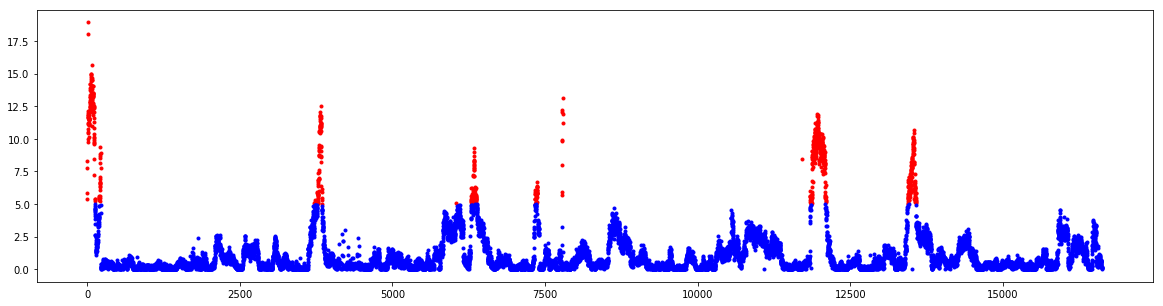

In [26]:
# manhattan pandas

fig, ax = plt.subplots(figsize=(20,5))

df = pd.read_csv("/Users/cmdb/qbb2018-answers/class4/plink.E6_Berbamine.qassoc", delim_whitespace=True)
df['P'] = -np.log10(df['P'])

sig = (df['P'] > 5)
df['P'][sig].plot(style='r.', ax=ax)
df['P'][~sig].plot(style='b.', ax=ax); # ~ means not
# pvals = df['P']
# xvals = list(range(len(pvals)))

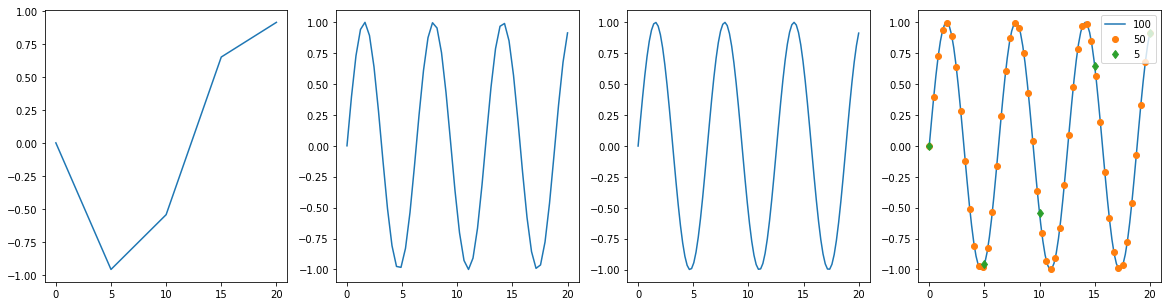

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
x1 = np.linspace(0,20,5)
y1 = np.sin(x1)
ax1.plot(x1, y1);

x2 = np.linspace(0,20,50)
y2 = np.sin(x2)
ax2.plot(x2, y2);

x3 = np.linspace(0,20,100)
y3 = np.sin(x3)
ax3.plot(x3, y3);

ax4.plot(x3, y3, label=100)
ax4.plot(x2, y2, 'o', label=50) # o for circle
ax4.plot(x1, y1, 'd', label=5) # d for diamond
ax4.legend(loc='upper right')